In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras

In [2]:
print(tensorflow.__version__)

2.15.0


In [3]:
# for GPU and not to overclock it which means that 50% of the GPU will be used and tensorflow, maybe won't be able to give proper results.
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
train_path = 'data/train'
test_path = 'data/test'

In [6]:
image_size = [224,224]

In [7]:
resnet = ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top = False)



94765736/94765736 [==============================] - 2s 0us/step


In [12]:
# in the previous step we work with the pretrained weights from the imagenet model.
# imagenet already has 1000 categories with different images.
# 90 MB file.
# And we also set the include_top to false because we are setting up the image size on our own i.e.,[224,224].

# include_top, the first and the last layer are removed.
# so we have to not train the model entirely

In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob('data/train/*')

In [10]:
folders

['data/train\\diseased cotton leaf',
 'data/train\\diseased cotton plant',
 'data/train\\fresh cotton leaf',
 'data/train\\fresh cotton plant']

In [11]:
resnet.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [12]:
# now we will flatten it, so that we can add the last number of nodes, on our wish.

x = Flatten()(resnet.output)

In [13]:
len(folders)

4

In [14]:
# because we have many categories we will go with softmax or else if we just had 2 categories, sigmoid would have been better.
prediction = Dense(len(folders), activation='softmax')(x)

In [15]:
model = Model(inputs = resnet.input, outputs = prediction)

In [16]:
model.summary()
# it will be a combination of 50 layers because we are using ResNet50.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [17]:
# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_set = train_datagen.flow_from_directory('data/train',
                                              target_size=(224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
                                          
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [20]:
r = model.fit_generator(train_set, 
                        validation_data= test_set, 
                        epochs=20, 
                        steps_per_epoch= len(train_set), 
                        validation_steps = len(test_set))

C:\Users\vinee\AppData\Local\Temp\ipykernel_4444\1467949485.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_set,


Epoch 1/20


61/61 [==============================] - 74s 1s/step - loss: 2.6727 - accuracy: 0.4121 - val_loss: 1.1306 - val_accuracy: 0.5660
Epoch 2/20
61/61 [==============================] - 71s 1s/step - loss: 1.0289 - accuracy: 0.5864 - val_loss: 1.0120 - val_accuracy: 0.5849
Epoch 3/20
61/61 [==============================] - 72s 1s/step - loss: 0.9617 - accuracy: 0.6258 - val_loss: 0.7444 - val_accuracy: 0.7170
Epoch 4/20
61/61 [==============================] - 72s 1s/step - loss: 0.7814 - accuracy: 0.6899 - val_loss: 0.8294 - val_accuracy: 0.5849
Epoch 5/20
61/61 [==============================] - 72s 1s/step - loss: 0.7571 - accuracy: 0.6914 - val_loss: 1.2187 - val_accuracy: 0.5377
Epoch 6/20
61/61 [==============================] - 71s 1s/step - loss: 1.0605 - accuracy: 0.6130 - val_loss: 0.8540 - val_accuracy: 0.5943
Epoch 7/20
61/61 [==============================] - 72s 1s/step - loss: 0.8820 - accuracy: 0.6674 - val_loss: 0.9725 - val_accuracy: 0.6604
Epoch 8/20
61/61 [

In [48]:
# ResNet50 has 25 million params.

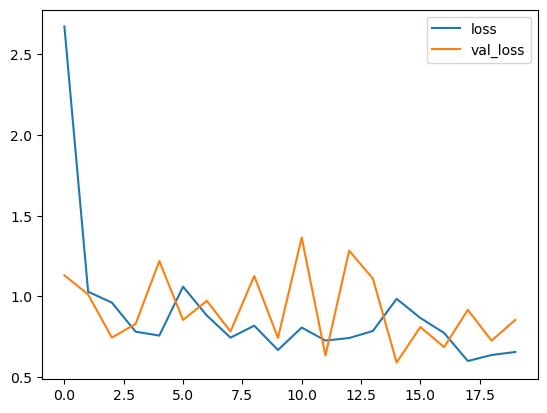

<Figure size 640x480 with 0 Axes>

In [21]:
# loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss_ResNet50')

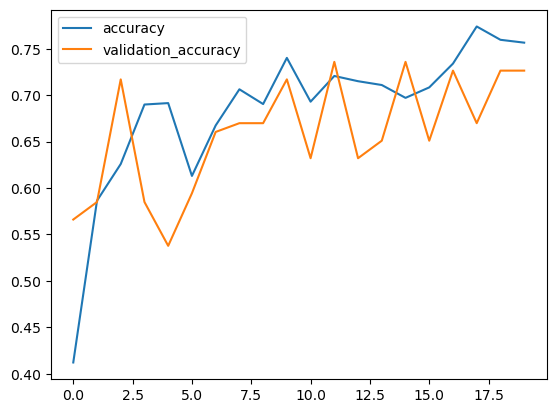

<Figure size 640x480 with 0 Axes>

In [22]:
# accuracy
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()
plt.savefig('acurracyVal_accuracy_ResNet50')

In [23]:
y_pred = model.predict(test_set)
y_pred

4/4 [==============================] - 6s 1s/step


array([[6.42020181e-02, 5.19267693e-02, 5.22903383e-01, 3.60967845e-01],
       [2.87786737e-04, 9.42576349e-01, 1.70990679e-04, 5.69649115e-02],
       [2.32805195e-03, 8.16341698e-01, 4.94069282e-05, 1.81280926e-01],
       [1.27903739e-04, 7.59949307e-06, 9.99080896e-01, 7.83563650e-04],
       [1.33179117e-03, 2.38508917e-02, 2.17315648e-03, 9.72644091e-01],
       [1.69129089e-06, 2.53808594e-06, 9.99005377e-01, 9.90464119e-04],
       [2.26625154e-04, 3.77249092e-01, 1.21880313e-02, 6.10336244e-01],
       [1.17288124e-04, 9.96716678e-01, 1.73103272e-05, 3.14861466e-03],
       [1.34298607e-05, 2.00661328e-02, 1.39126123e-03, 9.78529215e-01],
       [7.90365506e-03, 6.19073451e-01, 5.83162718e-02, 3.14706713e-01],
       [1.84402219e-04, 1.69546343e-04, 1.52518726e-06, 9.99644518e-01],
       [6.55535143e-04, 5.09303436e-02, 5.50668597e-01, 3.97745550e-01],
       [6.79636742e-06, 3.24613717e-03, 2.92575662e-03, 9.93821263e-01],
       [5.51984552e-03, 3.69925145e-03, 4.91403401e

In [24]:
len(y_pred)

106

In [25]:
y_pred.shape

(106, 4)

In [26]:
final_pred = np.argmax(y_pred, axis=1)

In [27]:
final_pred

array([2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 3, 2, 1, 3, 3, 2, 0, 2, 1, 1, 1, 3,
       2, 2, 1, 0, 3, 1, 3, 2, 3, 3, 1, 0, 3, 2, 2, 3, 2, 1, 3, 0, 3, 1,
       3, 1, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 1, 2, 3, 1, 2, 3, 3, 3, 2,
       1, 2, 2, 3, 1, 0, 3, 1, 3, 0, 0, 3, 1, 1, 2, 2, 2, 3], dtype=int64)

In [28]:
len(final_pred)

106

In [29]:
final_pred.shape

(106,)

In [30]:
model.save('model_ResNet50.h5')

c:\Users\vinee\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from tensorflow.keras.models import load_model

# Load your model
model = load_model('model_resnet50.h5')